## 【第12回】モジュールとパッケージ

#### 【A課題】`NumPy` と `Matplotlib` を用いて以下の仕様を満たすプログラムを作成せよ

* `NumPy` を用いて、角度 `x` を $-2\pi \geq x \geq 2\pi$ の範囲で200点生成
* 三角関数 $y = \sin (x)$ および $y = \cos (x)$ を計算
* $y = \sin (x)$  と $y = \cos (x)$ を同一のグラフ上に描画
* 両者が視覚的に区別できるように、色・線種を変更すること
* 凡例、タイトル、軸ラベル、グリッドを表示
* 提出はソースファイル（`.py`）

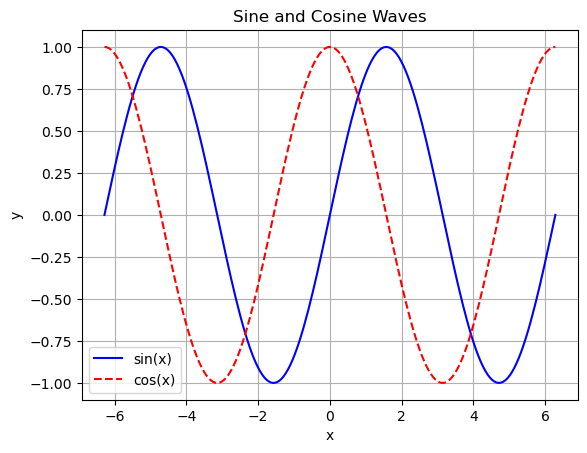

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. データの生成
x = np.linspace(2*-np.pi, 2*np.pi, 200) # -πからπまでを200分割
y_sin = np.sin(x)
y_cos = np.cos(x)

# 2. グラフの描画
plt.plot(x, y_sin, label='sin(x)', color='blue')
plt.plot(x, y_cos, label='cos(x)', color='red', linestyle='--') # cosは破線で区別

plt.title('Sine and Cosine Waves')
plt.xlabel('x')
plt.ylabel('y')
plt.legend() # 凡例を表示
plt.grid(True)
plt.show()


#### 【B課題】乱択アルゴリズムによる円周率計算

* `0 ~ 1` の正方形の領域に乱数で点を打ち、以下の式を満たす数を数える
    * $\sqrt{x^2 + y^2} < 1$
* 全体の点（$N_{sq}$）のうち、扇中に落ちた点の数（$N_{cir}$）とする
* $正方形の面積 : 扇の面積 = 1 : \frac{\pi}{4} = N_{sq} : N_{cir}$
    * $\pi = 4 \times \frac{N_{cir}}{N_{sq}}$

* 試行回数 $10^1, 10^2, 10^3, 10^4, 10^5, 10^6, 10^7$ の7通りについて円周率計算
* 各試行回数について円周率の計算値と真の値 $\pi$（`np.pi`）との差の絶対値を求め表示
* 誤差と試行回数の関係を横軸を対数軸（`set_xscale("log")`）としたグラフで表示
* NumPy 配列は `[:n]`のようにスライス可能
* 条件を満たす要素の個数は `np.sum(条件式)' で数えられる
* Matplotlib は NumPy 配列だけでなく Python リストも描画可能

--- 計算結果（整形表示） ---
         N |   Pi approximation |        Error
---------------------------------------------
        10 |       3.6000000000 |    4.584e-01
       100 |       3.3600000000 |    2.184e-01
      1000 |       3.0840000000 |    5.759e-02
     10000 |       3.1460000000 |    4.407e-03
    100000 |       3.1504000000 |    8.807e-03
   1000000 |       3.1433160000 |    1.723e-03
  10000000 |       3.1413356000 |    2.571e-04


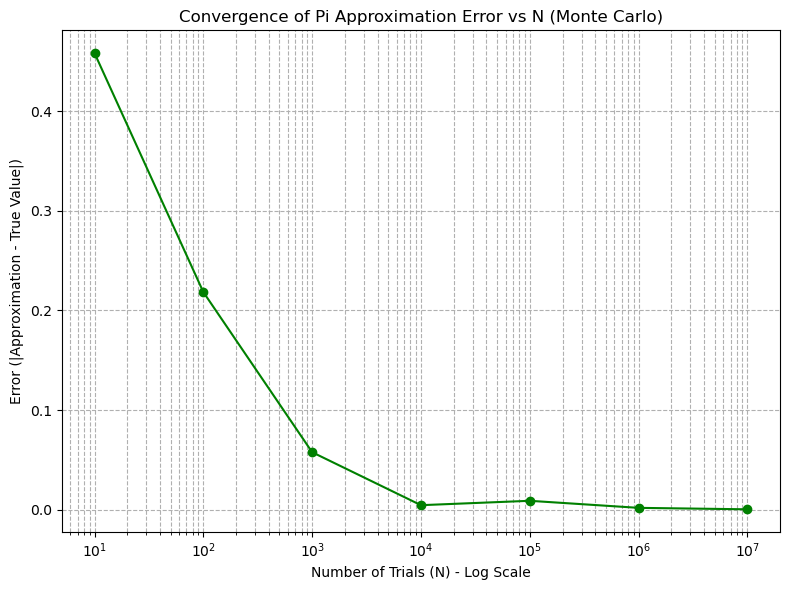

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 設定と乱数生成
# 検証する試行回数 N のリスト
N_steps = np.array([10, 100, 1000, 10000, 100000, 1000000,10000000])
max_N = N_steps[-1] # 最大試行回数は1,000,0000

# 一括で最大数分の乱数を生成（計算高速化のため、ここはNumPy必須）
x = np.random.rand(max_N)
y = np.random.rand(max_N)

# 原点からの距離の二乗を計算 (r^2 = x^2 + y^2)
dist_sq = x**2 + y**2

# 2. 各ステップでの計算と結果の格納
# 結果を格納するための空のリスト
results_approx_list = []
results_error_list = []

for n in N_steps:
    # 最初のn個のデータを取り出す (NumPyスライス)
    current_dist = dist_sq[:n]
    
    # 円の内部（距離の二乗が1.0以下）の点の数をカウント
    inside_count = np.sum(current_dist <= 1.0)
    
    # 円周率の近似値を計算
    pi_approx = 4 * (inside_count / n)
    
    # 真の値との誤差（絶対値）
    error = np.abs(np.pi - pi_approx)
    
    # 結果をリストに追加（append）で格納
    results_approx_list.append(pi_approx)
    results_error_list.append(error)

# 3. 計算結果の表示（整形表示）
print("--- 計算結果（整形表示） ---")
print(f"{'N':>10} | {'Pi approximation':>18} | {'Error':>12}")
print("-" * 45)

for i in range(len(N_steps)): #  # 各試行回数に対して結果を表示
    n = N_steps[i] # 試行回数
    pi_val = results_approx_list[i] # 近似値
    err = results_error_list[i] # 誤差

    print(f"{n:10d} | {pi_val:18.10f} | {err:12.3e}") # 整形表示


# 4. 可視化 (Matplotlib)
# Matplotlibのplot関数はリストも受け付ける
fig, ax = plt.subplots(figsize=(8, 6))

# --- グラフ：誤差の推移 ---
# N_steps はNumPy配列のまま、誤差データはリストを使用
ax.plot(N_steps, results_error_list, marker='o', linestyle='-', color='green')

# 装飾
ax.set_xscale('log') # X軸を対数軸に設定
ax.set_title('Convergence of Pi Approximation Error vs N (Monte Carlo)')
ax.set_xlabel('Number of Trials (N) - Log Scale')
ax.set_ylabel('Error (|Approximation - True Value|)')
ax.grid(True, which="both", ls="--")

plt.tight_layout() # レイアウト調整
plt.show() # グラフ表示

#### 【C課題】以下の仕様を満たすプログラムを作成せよ

* 楕円 $\frac{x^2}{4} + \frac{y^2}{9} = 1$に内接する長方形の面積 $S$ を最大化する問題を考える
* 面積が最大となる $x, y$ 座標と最大面積を求めて表示
* 楕円とその中で最大面積を持つ長方形を図示
* 長方形の面積は4倍の対称性を利用して表せる
* 楕円の式から $y$ を $x$ の関数として表すことができる

=== SymPy result ===
x = sqrt(2)
x = 1.4142135623730951
y = 3*sqrt(2)/2
y = 2.1213203435596424
Max area S = 12


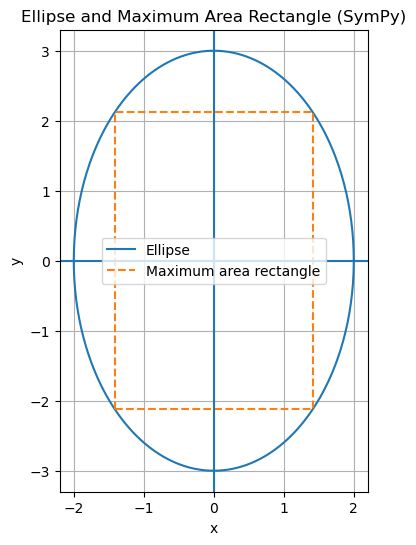

' #SciPy版\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom scipy.optimize import minimize_scalar\n\n# -------------------------------\n# 面積関数の定義（数値用）\n# -------------------------------\n\ndef rectangle_area(x):\n    # 範囲外を除外\n    if x < 0 or x > 2:\n        return np.inf\n\n    y = 3 * np.sqrt(1 - x**2 / 4)\n    S = 4 * x * y\n    return -S  # 最大化 → 最小化に変換\n\n# -------------------------------\n# SciPyによる最適化\n# -------------------------------\n\nresult = minimize_scalar(rectangle_area, bounds=(0, 2), method="bounded")\n\nx_opt = result.x\ny_opt = 3 * np.sqrt(1 - x_opt**2 / 4)\nS_max = 4 * x_opt * y_opt\n\nprint("=== SciPy result ===")\nprint(f"x = {x_opt:.6f}")\nprint(f"y = {y_opt:.6f}")\nprint(f"Max area S = {S_max:.6f}")\n\n# -------------------------------\n# Matplotlibによる描画\n# -------------------------------\n\ntheta = np.linspace(0, 2*np.pi, 400)\nx_ellipse = 2 * np.cos(theta)\ny_ellipse = 3 * np.sin(theta)\n\nplt.figure(figsize=(6, 6))\nplt.plot(x_ellipse, y_ellipse, lab

In [ ]:
import sympy as sp     # SymPy: 記号計算（解析的な微分・積分・方程式解法など）のためのライブラリをインポート
import numpy as np     # NumPy: 数値計算（配列操作、三角関数など）のためのライブラリをインポート
import matplotlib.pyplot as plt # Matplotlib: グラフ描画のためのライブラリをインポート

# -------------------------------
# SymPyによる解析計算
# -------------------------------

# この問題は、楕円 (x/a)^2 + (y/b)^2 = 1 に内接する長方形の面積の最大値を求めるものです。
# このコードでは、楕円の式を (x/2)^2 + (y/3)^2 = 1 と仮定しています（a=2, b=3）。
# 楕円に内接する長方形は座標軸に対して対称に取ると、面積が最大になります。
# 第一象限の頂点の座標を (x, y) とすると、長方形の幅は 2x、高さは 2y となり、面積 S は S = (2x)(2y) = 4xy となります。

# 変数定義
x = sp.symbols('x', positive=True) # 記号 'x' を定義。第一象限の座標なので x > 0 と指定。

# 楕円条件から y を表す
# 楕円の式: (x/2)^2 + (y/3)^2 = 1
# y^2 / 9 = 1 - x^2 / 4
# y = 3 * sqrt(1 - x^2 / 4)  (第一象限なので y > 0 の解を採用)
y = 3 * sp.sqrt(1 - x**2 / 4)

# 面積 S = 4xy
S = 4 * x * y # 長方形の面積 S を x の関数として定義

# 微分して最大値を求める
dSdx = sp.diff(S, x) # 面積 S を x で微分 (dS/dx)
# 最大値は dS/dx = 0 となる x の値で得られる（この問題では）
x_opt = sp.solve(dSdx, x)[0] # dS/dx = 0 の方程式を x について解き、最初の解 [0] を取得
y_opt = y.subs(x, x_opt)     # 求まった x_opt を y の式に代入し、最適な y_opt を計算
S_max = S.subs(x, x_opt)     # 求まった x_opt を面積 S の式に代入し、最大面積 S_max を計算

# 数値化
x_val = float(x_opt) # SymPyの記号解をPythonの浮動小数点数に変換
y_val = float(y_opt) # SymPyの記号解をPythonの浮動小数点数に変換

print("=== SymPy result ===")
# SymPyの simplify を使って、結果を最もシンプルな形で表示
print(f"x = {sp.simplify(x_opt)}")
print(f"x = {x_val}")
print(f"y = {sp.simplify(y_opt)}")
print(f"y = {y_val}")
print(f"Max area S = {sp.simplify(S_max)}")

# -------------------------------
# Matplotlibによる描画
# -------------------------------

# 楕円の描画のためのパラメータ表示
theta = np.linspace(0, 2*np.pi, 400) # 0 から 2π までの角度を400分割
# 楕円 (x/a)^2 + (y/b)^2 = 1 のパラメータ表示: x = a*cos(theta), y = b*sin(theta)
x_ellipse = 2 * np.cos(theta) # x 座標 (a=2)
y_ellipse = 3 * np.sin(theta) # y 座標 (b=3)

plt.figure(figsize=(6, 6)) # 描画領域を作成 (正方形に近くなるように設定)
plt.plot(x_ellipse, y_ellipse, label="Ellipse") # 楕円を描画

# 最大面積の長方形の描画
# 座標 (-x_val, -y_val), (x_val, -y_val), (x_val, y_val), (-x_val, y_val) を結ぶ
plt.plot(
    [-x_val, x_val, x_val, -x_val, -x_val], # x 座標のリスト。最後に最初の座標を繰り返し、閉じた図形にする
    [-y_val, -y_val, y_val, y_val, -y_val], # y 座標のリスト
    label="Maximum area rectangle",
    linestyle='--' # 破線で表示
)

plt.axhline(0)           # x軸 (y=0) に水平線を追加
plt.axvline(0)           # y軸 (x=0) に垂直線を追加
plt.gca().set_aspect("equal") # 縦横比を等しく設定し、楕円が歪まないようにする
plt.xlabel("x")          # x軸ラベル
plt.ylabel("y")          # y軸ラベル
plt.title("Ellipse and Maximum Area Rectangle (SymPy)") # グラフタイトル
plt.legend()             # 凡例を表示
plt.grid()               # グリッドを表示
plt.show()               # グラフを表示


=== SciPy result ===
x = 1.414213
y = 2.121321
Max area S = 12.000000


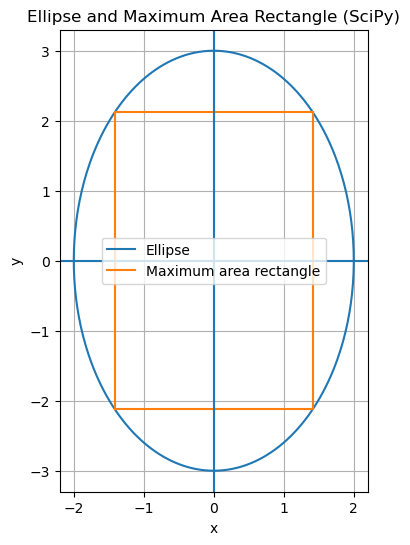

In [4]:
# SciPy版
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# -------------------------------
# 面積関数の定義（数値用）
# -------------------------------

def rectangle_area(x):
    # 範囲外を除外
    if x < 0 or x > 2:
        return np.inf

    y = 3 * np.sqrt(1 - x**2 / 4)
    S = 4 * x * y
    return -S  # 最大化 → 最小化に変換

# -------------------------------
# SciPyによる最適化
# -------------------------------

result = minimize_scalar(rectangle_area, bounds=(0, 2), method="bounded")

x_opt = result.x
y_opt = 3 * np.sqrt(1 - x_opt**2 / 4)
S_max = 4 * x_opt * y_opt

print("=== SciPy result ===")
print(f"x = {x_opt:.6f}")
print(f"y = {y_opt:.6f}")
print(f"Max area S = {S_max:.6f}")

# -------------------------------
# Matplotlibによる描画
# -------------------------------

theta = np.linspace(0, 2*np.pi, 400)
x_ellipse = 2 * np.cos(theta)
y_ellipse = 3 * np.sin(theta)

plt.figure(figsize=(6, 6))
plt.plot(x_ellipse, y_ellipse, label="Ellipse")
plt.plot(
    [-x_opt, x_opt, x_opt, -x_opt, -x_opt],
    [-y_opt, -y_opt, y_opt, y_opt, -y_opt],
    label="Maximum area rectangle"
)

plt.axhline(0)
plt.axvline(0)
plt.gca().set_aspect("equal")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ellipse and Maximum Area Rectangle (SciPy)")
plt.legend()
plt.grid()
plt.show()
